In [1]:
import os
os.getcwd()

path = '/Users/daylelee/Desktop/2024 DBB EXPERT/3_project'
os.chdir(path)
print(os.getcwd())

/Users/daylelee/Desktop/2024 DBB EXPERT/3_project


In [3]:
import pandas as pd
df = pd.read_excel('./data/DBB_21.2월 모집_장기/유지율_데이터_V2.xlsx')
df1 = df.copy()
df1_불량 = df1[df1['불량여부']==1].copy()
df1_정상 = df1[df1['불량여부']==0].copy()

In [189]:
# 데이터 전처리

# 1.계약의 보험시기와 보험종기간의 차이를 일 단위로 계산
df1.loc['보험기간_일'] = (pd.to_datetime(df1['보험기간종료일자'], format='%Y%m%d') - pd.to_datetime(df1['보험기간시작일자'], format='%Y%m%d')).dt.days
df1.loc[:,'보험기간_월'] = (df1['보험기간_일'] / 365).astype(int)

# 2.계약자성별코드 변환
df1['계약자성별코드'] = df['계약자성별코드'].astype(str)  # 모든 값을 문자열로 변환
df1['계약자성별코드_변환'] = df1['계약자성별코드'].map({'1':0, '2':1})
df1['계약자성별코드_변환'] = df1['계약자성별코드_변환'].fillna(0.5)
df1 = df1[df1['계약자성별코드_변환'] != 0.5]  #계약자성별코드에서 0.5를 결측치로 간주하고 해당 행 제거
df1.loc[:, '계약자성별코드_변환'] = df1['계약자성별코드_변환'].astype(int) # 원본 데이터프레임에 대해 명확하게 값을 할당

# 3.피보험자성별코드 변환
df1.loc[:, '피보험자성별코드_변환'] = df1['피보험자성별코드'] - 1

# 4.수금방법코드_매핑 변환
df1.loc[:, '수금방법코드_변환'] = df1['수금방법코드'].astype(str)
df1.loc[:, '수금방법코드_매핑'] = df1['수금방법코드_변환'].map({
    '3':'방문(직원)수금',
    '4':'지로',
    '7':'CMS',
    '9':'신용카드',
    '11':'급여이체'})

# 5.만기구분코드 변환 년만기=0 / 세만기=1 구분
df1.loc[:, '만기구분코드_변환'] = df1['만기구분코드'].copy() - 1

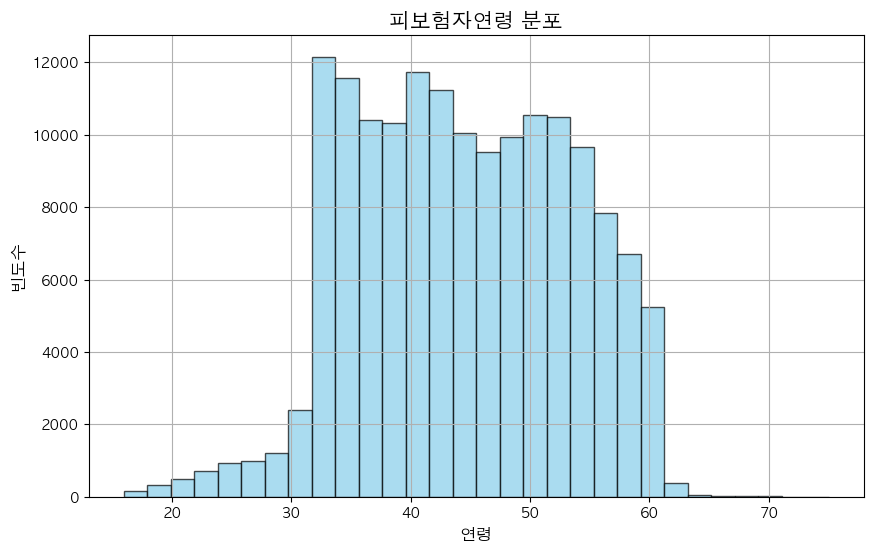

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정 (macOS에서는 'AppleGothic', Windows에서는 'Malgun Gothic')
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 히스토그램으로 연령 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df1['피보험자연령'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('피보험자연령 분포', fontsize=15)
plt.xlabel('연령', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.grid(True)
plt.show()

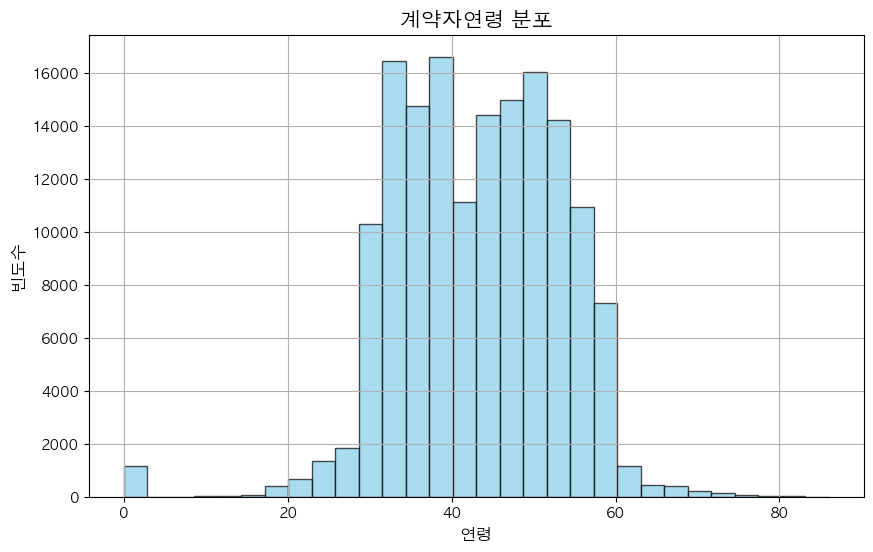

In [385]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정 (macOS에서는 'AppleGothic', Windows에서는 'Malgun Gothic')
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 히스토그램으로 연령 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df1['계약자연령'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('계약자연령 분포', fontsize=15)
plt.xlabel('연령', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.grid(True)
plt.show()

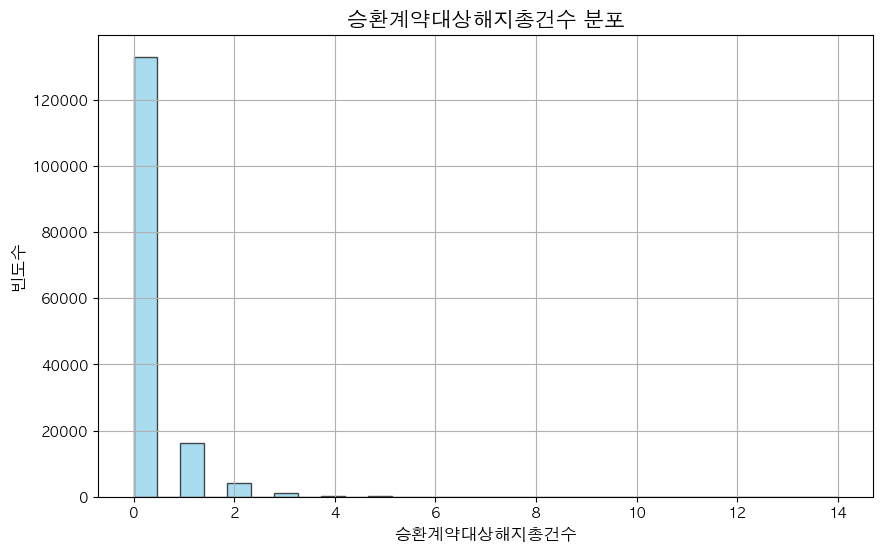

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 설정 (macOS에서는 'AppleGothic', Windows에서는 'Malgun Gothic')
plt.rcParams['font.family'] = 'AppleGothic'  # macOS인 경우

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 히스토그램으로 연령 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df1['승환계약대상해지총건수'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('승환계약대상해지총건수 분포', fontsize=15)
plt.xlabel('승환계약대상해지총건수', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.grid(True)
plt.show()

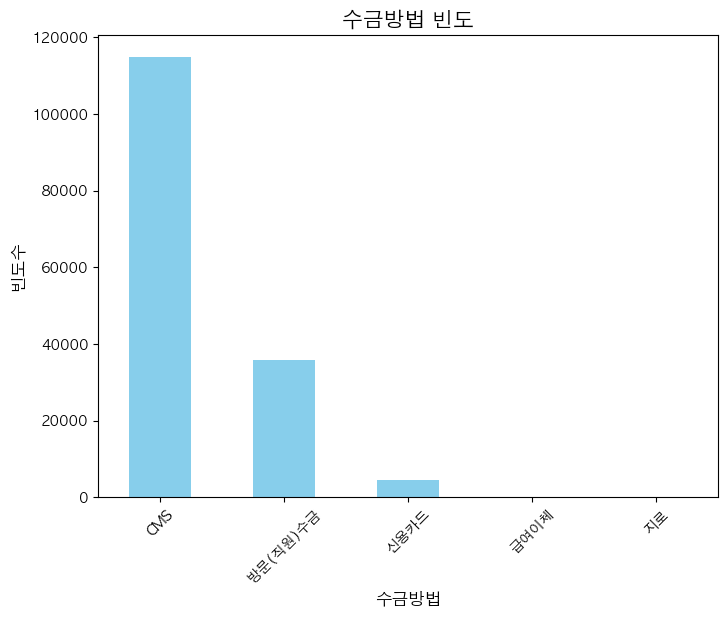

In [401]:

# 각 수금방법의 빈도 계산
value_counts = df1['수금방법코드_매핑'].value_counts()

# 세로형 바 그래프 그리기
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('수금방법 빈도', fontsize=15)
plt.xlabel('수금방법', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=45)  # x축 레이블 각도 조정
plt.show()

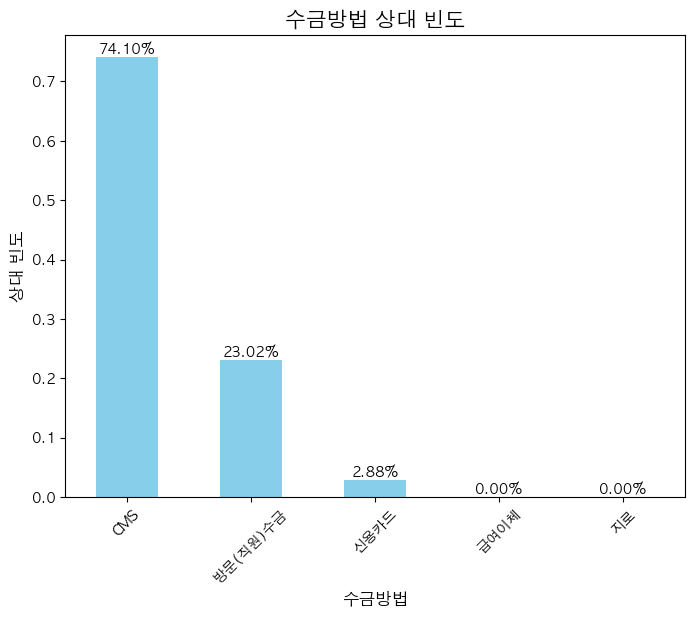

In [403]:
# 각 수금방법의 상대 빈도 계산
relative_freq = df1['수금방법코드_매핑'].value_counts(normalize=True)

# 각 수금방법의 빈도 계산
value_counts = df1['수금방법코드_매핑'].value_counts()

# 세로형 바 그래프로 상대 빈도 시각화
plt.figure(figsize=(8, 6))
ax = relative_freq.plot(kind='bar', color='skyblue')

# 각 막대 위에 상대 빈도 값 표시 (소수점 두 자리까지)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('수금방법 상대 빈도', fontsize=15)
plt.xlabel('수금방법', fontsize=12)
plt.ylabel('상대 빈도', fontsize=12)
plt.xticks(rotation=45)
plt.show()

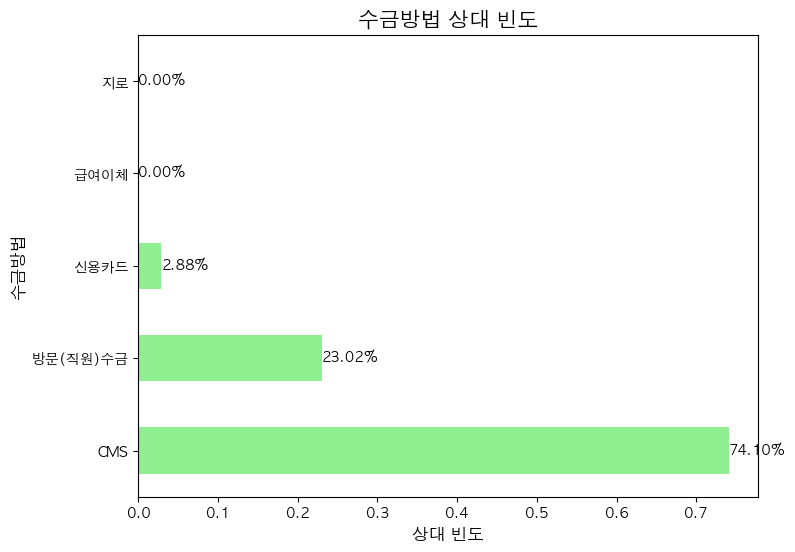

In [405]:
# 가로형 바 그래프로 상대 빈도 시각화
plt.figure(figsize=(8, 6))
ax = relative_freq.plot(kind='barh', color='lightgreen')

# 각 막대 옆에 상대 빈도 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2%}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('수금방법 상대 빈도', fontsize=15)
plt.xlabel('상대 빈도', fontsize=12)
plt.ylabel('수금방법', fontsize=12)
plt.show()

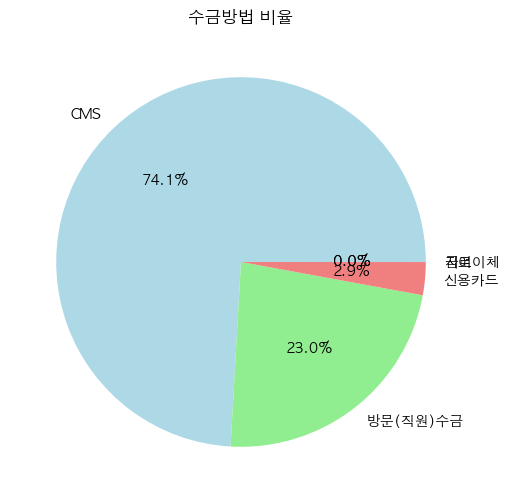

In [407]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 수금방법의 비율 계산
proportions = df1['수금방법코드_매핑'].value_counts(normalize=True)

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('수금방법 비율')
plt.show()

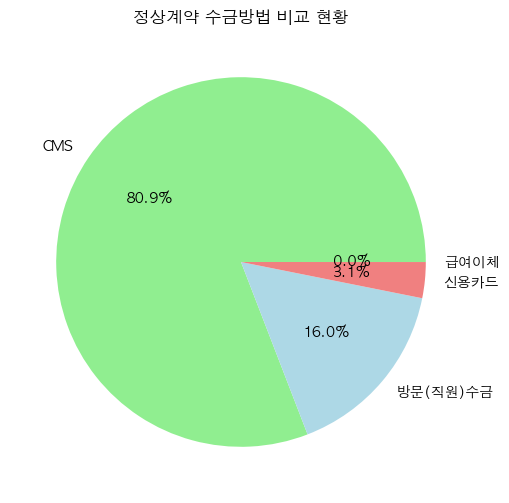

In [449]:
# 각 수금방법의 비율 계산
proportions = df1_정상['수금방법코드_매핑'].value_counts(normalize=True)

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightpink'])
plt.title('정상계약 수금방법 비교 현황')
plt.show()

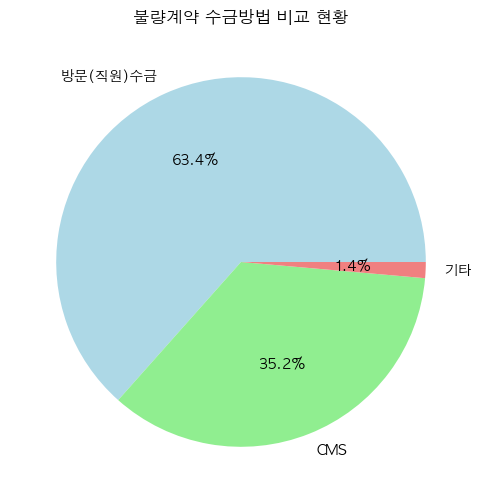

In [445]:
# 각 수금방법의 비율 계산
proportions = df1_불량['수금방법코드_매핑'].value_counts(normalize=True)

# 일정 비율 이하의 항목을 "그외"로 묶기
threshold = 0.1  # 10% 이하인 항목들을 "기타"로 묶음
others = proportions[proportions < threshold].sum()  # "그외" 항목들의 비율 합계
main_categories = proportions[proportions >= threshold]  # 주된 카테고리들

# "그외" 항목 추가
main_categories['기타'] = others

# 파이 차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(main_categories, labels=main_categories.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightpink'])
plt.title('불량계약 수금방법 비교 현황')
plt.show()

In [393]:
df1['승환계약대상해지총건수'].unique()

array([ 0,  1,  4,  2,  3,  5,  7,  8,  6,  9, 10, 13, 14, 11])

In [395]:
df1['승환계약대상해지총건수'].value_counts(True).sort_index()

승환계약대상해지총건수
0     0.858483
1     0.104092
2     0.026589
3     0.007044
4     0.002329
5     0.000813
6     0.000348
7     0.000161
8     0.000052
9     0.000032
10    0.000032
11    0.000006
13    0.000006
14    0.000013
Name: proportion, dtype: float64

In [287]:
df1.columns

Index(['증권번호', '보험기간시작일자', '보험기간종료일자', '수금자사원번호', '수금방법코드', '만기년수', '만기구분코드',
       'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', '계약자고객번호', '계약자연령', '계약자성별코드',
       '승환계약대상해지총건수', '승환계약여부', '피보험자연령', '피보험자고객번호', '주피보험자상해급수코드',
       '주피보험자직업코드', '피보험자성별코드', '개인단체구분코드', '납입년수', '모집자사원번호', '지점번호', '출장소번호',
       '사업단번호', '본부번호', '조직번호', '대표대리점번호', '대표대리점여부', '모대리점번호', '차월수',
       '납입대상보험료', '적립보험료', '보장보험료', '불량여부', '모집자_직전년도체결건수', '모집자_직전3년체결건수',
       '모집자_직전년도해지건수', '모집자_직전3년해지건수', '계약자_직전년도체결건수', '계약자_직전3년체결건수',
       '계약자_직전년도해지건수', '계약자_직전3년해지건수', '피보험자_직전년도체결건수', '피보험자_직전3년체결건수',
       '피보험자_직전년도해지건수', '피보험자_직전3년해지건수', '계약자성별코드_변환', '보험기간_일', '보험기간_월'],
      dtype='object')

In [337]:
feature = ['불량여부', '보험기간_일', '보험기간_월',
           '수금방법코드', '만기년수', '만기구분코드_변환',
           'PA계약여부', 'PA가족계약여부', 'PA본인계약여부',
           '계약자연령', '계약자성별코드_변환',
           '승환계약대상해지총건수', '승환계약여부',
           '피보험자연령', '주피보험자상해급수코드',
           '피보험자성별코드',
           '납입년수',
           '차월수','납입대상보험료', '적립보험료', '보장보험료',
           '모집자_직전년도체결건수', '모집자_직전3년체결건수','모집자_직전년도해지건수', '모집자_직전3년해지건수',
           '계약자_직전년도체결건수', '계약자_직전3년체결건수', '계약자_직전년도해지건수', '계약자_직전3년해지건수',
           '피보험자_직전년도체결건수', '피보험자_직전3년체결건수', '피보험자_직전년도해지건수', '피보험자_직전3년해지건수']

In [335]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155027 entries, 0 to 155214
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   증권번호           155027 non-null  int64 
 1   보험기간시작일자       155027 non-null  int64 
 2   보험기간종료일자       155027 non-null  int64 
 3   수금자사원번호        155027 non-null  object
 4   수금방법코드         155027 non-null  int64 
 5   만기년수           155027 non-null  int64 
 6   만기구분코드         155027 non-null  int64 
 7   PA계약여부         155027 non-null  int64 
 8   PA가족계약여부       155027 non-null  int64 
 9   PA본인계약여부       155027 non-null  int64 
 10  계약자고객번호        155027 non-null  int64 
 11  계약자연령          155027 non-null  int64 
 12  계약자성별코드        155027 non-null  object
 13  승환계약대상해지총건수    155027 non-null  int64 
 14  승환계약여부         155027 non-null  int64 
 15  피보험자연령         155027 non-null  int64 
 16  피보험자고객번호       155027 non-null  int64 
 17  주피보험자상해급수코드    155027 non-null  int64 
 18  주피보험자직업코드

In [349]:
# EDA 시행
print("* 대상 데이터 기준:\n장기보유계약명세_월 테이블\n1. 202408 마감월 기준\n2. 2022년도 보험가입\n3. 납입방법: 월납\n4. 30636 상품코드(GA전용 훼밀리플러스건강보험)\n5. 계약상태: 소멸, 철회, 취소 제외")
print("\n* 불량기준:\n- 납입회차 15회 이하인 경우, 불량여부를 1로 표기\n- 이외 불량여부 0으로 표기\n")
print("전체계약건수 :", len(set(df['증권번호'])),"\n15회차 이전 해지계약건수 :", len(set(df[df['불량여부']==1]['증권번호'])),"\n")
print(df.dtypes)
print('\n')
print('수금방법코드 :',set(df['수금방법코드']))
print('만기구분코드 :',set(df['만기구분코드']))
print('PA계약여부 :',set(df['PA계약여부']))
print('PA가족계약여부 :',set(df1['PA가족계약여부']))
print('PA본인계약여부 :',set(df1['PA본인계약여부']))
print('계약자성별코드_변환 :',set(df1['계약자성별코드_변환']))
print('승환계약여부 :',set(df1['승환계약여부']))
print('주피보험자상해급수코드 :',set(df['주피보험자상해급수코드']))
print('피보험자성별코드 :',set(df['피보험자성별코드']))
print('개인단체구분코드 :',set(df['개인단체구분코드']))
print('불량여부 :',set(df['불량여부']))
print('\n')
print(df['피보험자성별코드'].value_counts(True))
print(df1['계약자성별코드_변환'].value_counts(True))
print(df['승환계약여부'].value_counts(True))
print(df1['불량여부'].value_counts(True))

* 대상 데이터 기준:
장기보유계약명세_월 테이블
1. 202408 마감월 기준
2. 2022년도 보험가입
3. 납입방법: 월납
4. 30636 상품코드(GA전용 훼밀리플러스건강보험)
5. 계약상태: 소멸, 철회, 취소 제외

* 불량기준:
- 납입회차 15회 이하인 경우, 불량여부를 1로 표기
- 이외 불량여부 0으로 표기

전체계약건수 : 155215 
15회차 이전 해지계약건수 : 22999 

증권번호              int64
보험기간시작일자          int64
보험기간종료일자          int64
수금자사원번호          object
수금방법코드            int64
만기년수              int64
만기구분코드            int64
PA계약여부            int64
PA가족계약여부          int64
PA본인계약여부          int64
계약자고객번호           int64
계약자연령             int64
계약자성별코드          object
승환계약대상해지총건수       int64
승환계약여부            int64
피보험자연령            int64
피보험자고객번호          int64
주피보험자상해급수코드       int64
주피보험자직업코드        object
피보험자성별코드          int64
개인단체구분코드          int64
납입년수              int64
모집자사원번호          object
지점번호              int64
출장소번호            object
사업단번호             int64
본부번호              int64
조직번호              int64
대표대리점번호          object
대표대리점여부          object
모대리점번호           object
차월수               int64
납입대상보험

In [71]:
len(set(df['개인단체구분코드']))

1

In [81]:
df.groupby(['모집자_직전년도체결건수'])['증권번호'].count()

모집자_직전년도체결건수
0      37291
1       3986
2       3821
3       3161
4       3199
       ...  
558       56
566       13
608       22
621       38
756       57
Name: 증권번호, Length: 286, dtype: int64

In [69]:
df.groupby('계약자성별코드')['계약자연령'].mean()

계약자성별코드
1    42.450138
2    43.828527
      0.968085
Name: 계약자연령, dtype: float64

In [185]:
df['차월수'].value_counts().sort_index().head(20)
#df['모집자사원번호'].value_counts().tail(20)

차월수
0     151610
23         2
24        10
25         4
26        21
27        28
28        52
29        59
30        29
31        28
32        48
33        30
34        42
35        45
36       110
37        37
38        91
39        53
40        37
41        40
Name: count, dtype: int64

In [145]:
len(set(df['주피보험자직업코드']))

661

In [307]:
df1.filter(like="코드")

,수금방법코드,만기구분코드,계약자성별코드,주피보험자상해급수코드,주피보험자직업코드,피보험자성별코드,개인단체구분코드,계약자성별코드_변환,피보험자성별코드_변환
0,3,2,2,1,B3200,2,1,1,1
1,7,2,2,2,23543,2,1,1,1
2,7,1,2,2,24799,2,1,1,1
3,9,2,1,3,84151,1,1,0,0
4,7,2,1,2,93003,1,1,0,0
...,...,...,...,...,...,...,...,...,...
155210,7,2,1,2,A1121,1,1,0,0
155211,3,2,1,1,31110,1,1,0,0
155212,7,2,1,1,41111,1,1,0,0
155213,7,2,2,1,31110,1,1,1,0
